In [2]:
import tensorflow as tf
from IPython.display import Image

import matplotlib.pyplot as plt
import tensorflow_hub as hub

import numpy as np

import warnings
warnings.filterwarnings('ignore')

Creating a Log file for tensorboard

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import time
NAME="shit-leaf-cnn-{}".format(int(time.time()))
tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))

In [3]:
!dir beans\train\angular_leaf_spot
!dir beans\train\bean_rust
!dir beans\train\healthy

 Volume in drive C is Windows
 Volume Serial Number is 56C2-B3A5

 Directory of C:\Users\test\beans\train\angular_leaf_spot

05/12/2022  07:07 PM    <DIR>          .
05/12/2022  07:07 PM    <DIR>          ..
05/12/2022  07:07 PM           172,270 angular_leaf_spot_train.0.jpg
05/12/2022  07:07 PM           128,332 angular_leaf_spot_train.1.jpg
05/12/2022  07:07 PM           150,876 angular_leaf_spot_train.10.jpg
05/12/2022  07:07 PM           132,481 angular_leaf_spot_train.100.jpg
05/12/2022  07:07 PM           124,961 angular_leaf_spot_train.101.jpg
05/12/2022  07:07 PM           139,883 angular_leaf_spot_train.102.jpg
05/12/2022  07:07 PM           145,412 angular_leaf_spot_train.103.jpg
05/12/2022  07:07 PM           142,126 angular_leaf_spot_train.104.jpg
05/12/2022  07:07 PM           133,430 angular_leaf_spot_train.105.jpg
05/12/2022  07:07 PM           126,473 angular_leaf_spot_train.106.jpg
05/12/2022  07:07 PM           145,171 angular_leaf_spot_train.107.jpg
05/12/2022  07:0

05/12/2022  07:07 PM           128,633 angular_leaf_spot_train.259.jpg
05/12/2022  07:07 PM           140,228 angular_leaf_spot_train.26.jpg
05/12/2022  07:07 PM           118,398 angular_leaf_spot_train.260.jpg
05/12/2022  07:07 PM           124,112 angular_leaf_spot_train.261.jpg
05/12/2022  07:07 PM           170,346 angular_leaf_spot_train.262.jpg
05/12/2022  07:07 PM           137,813 angular_leaf_spot_train.263.jpg
05/12/2022  07:07 PM           146,389 angular_leaf_spot_train.264.jpg
05/12/2022  07:07 PM           156,029 angular_leaf_spot_train.265.jpg
05/12/2022  07:07 PM           133,940 angular_leaf_spot_train.266.jpg
05/12/2022  07:07 PM           161,808 angular_leaf_spot_train.267.jpg
05/12/2022  07:07 PM           114,782 angular_leaf_spot_train.268.jpg
05/12/2022  07:07 PM           116,652 angular_leaf_spot_train.269.jpg
05/12/2022  07:07 PM           121,390 angular_leaf_spot_train.27.jpg
05/12/2022  07:07 PM           163,288 angular_leaf_spot_train.270.jpg
05/12/20

05/12/2022  07:07 PM           143,266 bean_rust_train.171.jpg
05/12/2022  07:07 PM           127,996 bean_rust_train.172.jpg
05/12/2022  07:07 PM           121,308 bean_rust_train.173.jpg
05/12/2022  07:07 PM           115,381 bean_rust_train.174.jpg
05/12/2022  07:07 PM           157,315 bean_rust_train.175.jpg
05/12/2022  07:07 PM           120,082 bean_rust_train.176.jpg
05/12/2022  07:07 PM           117,195 bean_rust_train.177.jpg
05/12/2022  07:07 PM           148,463 bean_rust_train.178.jpg
05/12/2022  07:07 PM           124,405 bean_rust_train.179.jpg
05/12/2022  07:07 PM           141,262 bean_rust_train.18.jpg
05/12/2022  07:07 PM           143,432 bean_rust_train.180.jpg
05/12/2022  07:07 PM           106,814 bean_rust_train.181.jpg
05/12/2022  07:07 PM           109,585 bean_rust_train.182.jpg
05/12/2022  07:07 PM           115,336 bean_rust_train.183.jpg
05/12/2022  07:07 PM           134,515 bean_rust_train.184.jpg
05/12/2022  07:07 PM           123,672 bean_rust_train.1

05/12/2022  07:07 PM           146,399 healthy_train.251.jpg
05/12/2022  07:07 PM           127,813 healthy_train.252.jpg
05/12/2022  07:07 PM           153,052 healthy_train.253.jpg
05/12/2022  07:07 PM           133,883 healthy_train.254.jpg
05/12/2022  07:07 PM           134,553 healthy_train.255.jpg
05/12/2022  07:07 PM           127,842 healthy_train.256.jpg
05/12/2022  07:07 PM           147,026 healthy_train.257.jpg
05/12/2022  07:07 PM           153,100 healthy_train.258.jpg
05/12/2022  07:07 PM           152,919 healthy_train.259.jpg
05/12/2022  07:07 PM           139,965 healthy_train.26.jpg
05/12/2022  07:07 PM           119,400 healthy_train.260.jpg
05/12/2022  07:07 PM           152,817 healthy_train.261.jpg
05/12/2022  07:07 PM           169,356 healthy_train.262.jpg
05/12/2022  07:07 PM           158,766 healthy_train.263.jpg
05/12/2022  07:07 PM           134,191 healthy_train.264.jpg
05/12/2022  07:07 PM           126,734 healthy_train.265.jpg
05/12/2022  07:07 PM     

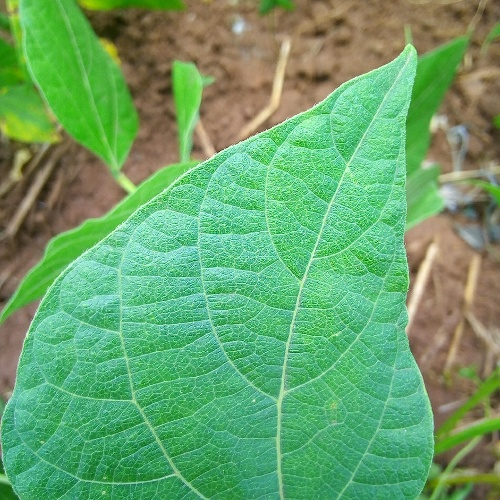

In [4]:
Image(filename='beans/train/healthy/healthy_train.0.jpg',width = 200, height = 200) 

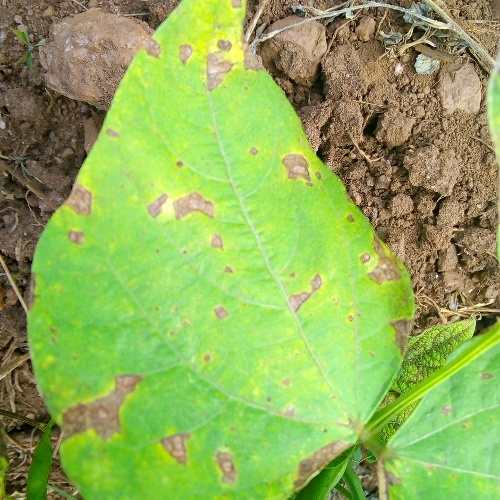

In [5]:
Image('beans/train/angular_leaf_spot/angular_leaf_spot_train.124.jpg',width=200,height=200)

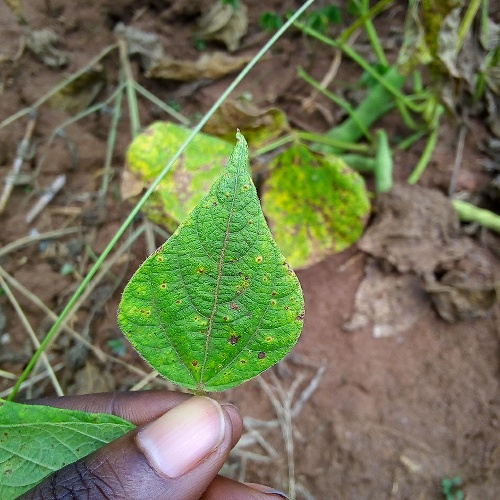

In [6]:
Image('beans/train/bean_rust/bean_rust_train.162.jpg',width=200,height=200)

Setting batch size, image height and width.

In [7]:
batch_size = 128
img_height = 224
img_width = 224

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/train',
  seed=111,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1034 files belonging to 3 classes.


In [9]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/test',
  seed=111,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 128 files belonging to 3 classes.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/validation',
  seed=111,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 133 files belonging to 3 classes.


In [11]:
classes=train_ds.class_names
print(classes)

['angular_leaf_spot', 'bean_rust', 'healthy']


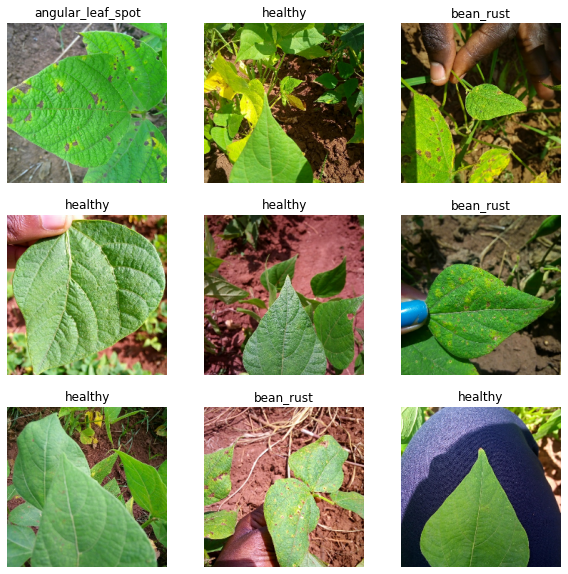

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")

Setting a Autotune so that next bacth of images will automatically will be loaded in cache.

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [15]:
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape=(img_height,img_width,3))

In [16]:
feature_extractor_layer.trainable = False

In [17]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [18]:
tf.random.set_seed(111)

In [19]:
model2 = tf.keras.Sequential([
  normalization_layer,
  feature_extractor_layer,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(3,activation='softmax')
])

In [20]:
model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [21]:
history = model2.fit(train_ds, epochs=25, validation_data=val_ds,callbacks=tensorboard)

Epoch 1/25
9/9 [==============================] - 24s 2s/step - loss: 1.1460 - accuracy: 0.4352 - val_loss: 0.7912 - val_accuracy: 0.6015
Epoch 2/25
9/9 [==============================] - 15s 2s/step - loss: 0.8058 - accuracy: 0.6325 - val_loss: 0.6004 - val_accuracy: 0.7594
Epoch 3/25
9/9 [==============================] - 17s 2s/step - loss: 0.6324 - accuracy: 0.7311 - val_loss: 0.5179 - val_accuracy: 0.7669
Epoch 4/25
9/9 [==============================] - 17s 2s/step - loss: 0.5588 - accuracy: 0.7766 - val_loss: 0.4722 - val_accuracy: 0.7820
Epoch 5/25
9/9 [==============================] - 17s 2s/step - loss: 0.4916 - accuracy: 0.8056 - val_loss: 0.4339 - val_accuracy: 0.8045
Epoch 6/25
9/9 [==============================] - 16s 2s/step - loss: 0.4625 - accuracy: 0.8162 - val_loss: 0.4127 - val_accuracy: 0.8120
Epoch 7/25
9/9 [==============================] - 17s 2s/step - loss: 0.4239 - accuracy: 0.8240 - val_loss: 0.3895 - val_accuracy: 0.8271
Epoch 8/25
9/9 [==================

In [22]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


For more detailes you can go to my tensorboard page
>https://tensorboard.dev/experiment/9qvRbcM5TJCJd81Qt5eoFA/#scalars

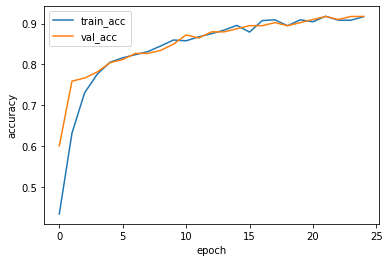

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='best')
plt.show()

In [25]:
result=model2.evaluate(test_ds)

1/1 [==============================] - 2s 2s/step - loss: 0.2626 - accuracy: 0.8906


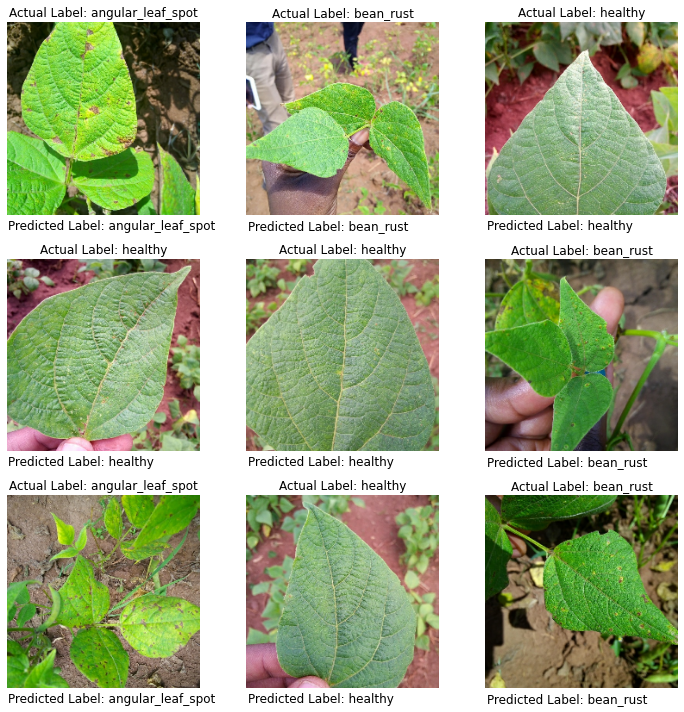

In [27]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        plt.tight_layout()

        img = tf.keras.preprocessing.image.img_to_array(images[i])                    
        img = np.expand_dims(img, axis=0)  

        pred=model2.predict(img)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Actual Label: %s" % classes[labels[i]])
        plt.text(1, 240, "Predicted Label: %s" % classes[np.argmax(pred)], fontsize=12)

        plt.axis("off")

Model saving.

In [28]:
model2.save('./models', save_format='tf')

INFO:tensorflow:Assets written to: ./models\assets


INFO:tensorflow:Assets written to: ./models\assets


In [29]:
model_loaded = tf.keras.models.load_model('./models/')

In [30]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________
